#Use Case 4

Regular imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import CPTAC data

In [2]:
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


Retrieve protein abudance and somatic gene mutations, represented in binary format: 0 if no mutation is present, 1 if mutation is present.

In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()

Find gene with high frequency of mutation

In [4]:
high = somatic_mutations.sum() == max(somatic_mutations.sum())
gene = somatic_mutations[somatic_mutations.columns[high]].columns[0]
print(gene)

PTEN


Use found gene to compare somatic and protein abundance

In [5]:
cross = CPTAC.compare_gene(somatic_mutations, proteomics, gene)
print(cross)

      somatic  proteomics
S001        1       -0.55
S002        1       -0.94
S003        1       -1.12
S004        1        0.55
S005        0       -0.39
S006        1        0.00
S007        1       -1.03
S008        0        0.10
S009        1        0.50
S010        1        0.06
S011        1       -1.63
S012        0       -0.29
S013        1       -1.05
S014        0       -0.47
S015        0       -0.57
S016        0        0.28
S017        0        0.07
S018        1       -1.68
S019        1        0.66
S020        1       -1.08
S021        1       -1.16
S022        1       -0.87
S023        1       -0.46
S024        1       -0.86
S025        1       -0.24
S026        1       -0.45
S027        1        0.54
S028        1        0.34
S029        1       -0.57
S030        0       -1.28
...       ...         ...
S071        1       -0.40
S072        1        0.62
S073        1        0.01
S074        1        0.07
S075        1       -0.16
S076        1       -0.69
S077        

Plot boxplot of comparison between protein abundance in mutated against non-mutated

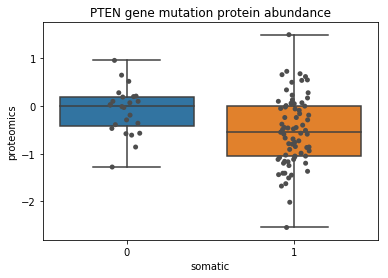

In [8]:
somatic_boxplot = sns.boxplot(data=cross, x="somatic",y="proteomics").set_title("PTEN gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="somatic", y="proteomics",jitter=True, color=".3")
plt.show()